In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif)

# Functions

In [ ]:
baseplot.fx <- function(df, x, y, clr, clr_palette, sampletype) {
  if (sampletype == "PBMC") {
    mybreaks <- c(1, 10, 100, 500, 1000, 1500)
  } else {
    mybreaks <- c(1, 10, 50, 100)
  }
  myp <- ggplot(
    df,
    aes(x = eval(as.name(x)), y = eval(as.name(y)))
  ) +
    geom_boxplot() + #
    geom_beeswarm(aes(color = eval(as.name(clr))), cex = 2) +
    scale_color_manual(values = clr_palette) +
    myplot +
    myaxis +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), axis.title.x = element_blank()) +
    annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks)
  return(myp)
}


In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [39]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [40]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [41]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

In [43]:
meta_div$log10shann <- log10(meta_div$observed_Shannon)

In [44]:
meta_div$agegroup <- NA

meta_div$agegroup[ which(meta_div$Age < 2)] <- "< 2 yrs"
meta_div$agegroup[ which(meta_div$Age >= 2 & meta_div$Age < 5)] <- "2-4 yrs"
meta_div$agegroup[ which(meta_div$Age >= 5 & meta_div$Age < 12)] <- "5-11 yrs"
meta_div$agegroup[ which(meta_div$Age >= 12 & meta_div$Age < 18)] <- "12-17 yrs"
meta_div$agegroup[ which(meta_div$Age >= 18)] <- ">= 18 yrs"

In [45]:
meta_div$cancergroup[ which(meta_div$cancergroup == "Solid")] <- "Solid tumors"

Separate PBMC and cfDNA

In [46]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [47]:
#pbmc_noLFS <- pbmc[ which(pbmc$cancergroup != "LFS"),] # remove LFS for now

In [49]:
dim(pbmc)

[1] 191  60

In [50]:
names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

## rms

In [51]:
pacman::p_load(rms)

In [52]:
dd <- datadist(pbmc[ , c("cycle", "Disease_type", "Age", "log10shann", "cancergroup", "agegroup")])
options(datadist="dd")

In [53]:
options(prType="plain")

In [54]:
f <- ols(log10shann ~ cycle + cancergroup + Age, data = pbmc)


In [55]:
f

Linear Regression Model

ols(formula = log10shann ~ cycle + cancergroup + Age, data = pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     191    LR chi2     27.17    R2       0.133    
sigma0.5709    d.f.            7    R2 adj   0.099    
d.f.    183    Pr(> chi2) 0.0003    g        0.250    

Residuals

    Min      1Q  Median      3Q     Max 
-1.6758 -0.3382  0.0230  0.4086  1.3733 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.9869 0.1093 18.18 <0.0001 
cycle=X02                 0.3915 0.1212  3.23 0.0015  
cycle=X03                 0.0865 0.1238  0.70 0.4856  
cycle=X04                 0.0920 0.1383  0.67 0.5068  
cycle=X05                 0.2982 0.1334  2.23 0.0267  
cancergroup=Lymphoma     -0.1877 0.1275 -1.47 0.1427  
cancergroup=Solid tumors -0.1762 0.0941 -1.87 0.0629  
Age                      -0.0175 0.0074 -2.36 0.0192  


In [56]:
anova(f)

,d.f.,Partial SS,MS,F,P
cycle,4,4.457746,1.1144365,3.419098,0.0100688960
cancergroup,2,1.406349,0.7031743,2.157343,0.1185638861
Age,1,1.820498,1.8204977,5.585297,0.0191607433
TOTAL,7,9.119646,1.3028065,3.997018,0.0004296129
ERROR,183,59.647868,0.3259446,NA,NA


In [57]:
print(f)

Linear Regression Model

ols(formula = log10shann ~ cycle + cancergroup + Age, data = pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     191    LR chi2     27.17    R2       0.133    
sigma0.5709    d.f.            7    R2 adj   0.099    
d.f.    183    Pr(> chi2) 0.0003    g        0.250    

Residuals

    Min      1Q  Median      3Q     Max 
-1.6758 -0.3382  0.0230  0.4086  1.3733 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.9869 0.1093 18.18 <0.0001 
cycle=X02                 0.3915 0.1212  3.23 0.0015  
cycle=X03                 0.0865 0.1238  0.70 0.4856  
cycle=X04                 0.0920 0.1383  0.67 0.5068  
cycle=X05                 0.2982 0.1334  2.23 0.0267  
cancergroup=Lymphoma     -0.1877 0.1275 -1.47 0.1427  
cancergroup=Solid tumors -0.1762 0.0941 -1.87 0.0629  
Age                      -0.0175 0.0074 -2.36 0.0192  



In [58]:
summary(f)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
Age,2,14,12,-0.21027058,0.08897241,-0.3858142,-0.034726952,1
cycle - X01:X02,2,1,NA,-0.39154745,0.12119786,-0.6306723,-0.152422623,1
cycle - X03:X02,2,3,NA,-0.30503718,0.12343158,-0.5485692,-0.061505203,1
cycle - X04:X02,2,4,NA,-0.29958705,0.13811414,-0.5720879,-0.027086201,1
cycle - X05:X02,2,5,NA,-0.09338248,0.13340029,-0.3565829,0.169817887,1
cancergroup - Lymphoma:Leukemia,1,2,NA,-0.18766435,0.12748775,-0.4391992,0.063870496,1
cancergroup - Solid tumors:Leukemia,1,3,NA,-0.17619114,0.09413717,-0.3619249,0.009542614,1


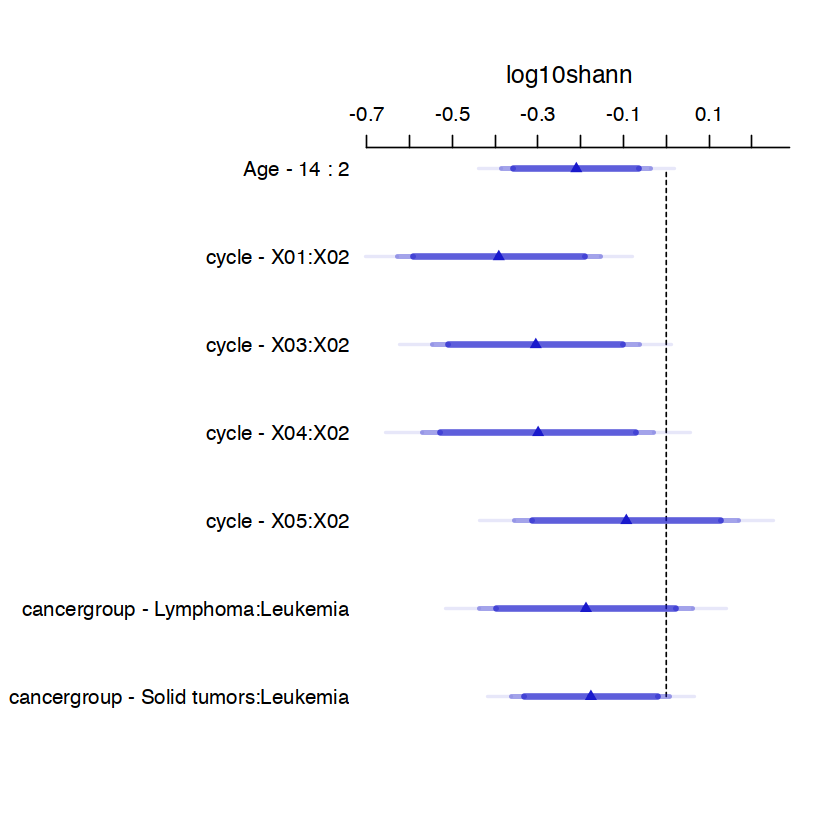

In [59]:
plot(summary(f))


In [60]:
tapply(pbmc$log10shann, pbmc$cycle, summary)

$X01
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.317   1.899   1.744   2.276   2.744 

$X02
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.100   1.768   2.222   2.114   2.457   3.005 

$X03
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2574  1.4671  1.8497  1.8347  2.3673  3.1838 

$X04
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9663  1.4727  1.8780  1.8646  2.1808  2.6821 

$X05
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2907  1.9186  2.0997  2.0714  2.4287  2.7837 


In [61]:
f <- ols(log10shann ~ cycle + cancergroup + agegroup, data = pbmc)
f

Linear Regression Model

ols(formula = log10shann ~ cycle + cancergroup + agegroup, data = pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     191    LR chi2     29.34    R2       0.142    
sigma0.5724    d.f.           10    R2 adj   0.095    
d.f.    180    Pr(> chi2) 0.0011    g        0.258    

Residuals

     Min       1Q   Median       3Q      Max 
-1.64470 -0.34594  0.04791  0.39642  1.29338 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.9907 0.1163 17.11 <0.0001 
cycle=X02                 0.4075 0.1223  3.33 0.0010  
cycle=X03                 0.1126 0.1245  0.90 0.3668  
cycle=X04                 0.1142 0.1398  0.82 0.4149  
cycle=X05                 0.3475 0.1353  2.57 0.0110  
cancergroup=Lymphoma     -0.2317 0.1311 -1.77 0.0788  
cancergroup=Solid tumors -0.1558 0.0962 -1.62 0.1069  
agegroup=>= 18 yrs       -0.3846 0.1748 -2.20 0.0291  
agegroup=12-17 yrs       -

## plots for age groups

### PBMC

In [63]:
table(pbmc$agegroup)


  < 2 yrs >= 18 yrs 12-17 yrs   2-4 yrs  5-11 yrs 
       46        16        58        21        50 

In [64]:
pbmc$agegroup <- factor(pbmc$agegroup, levels = c("< 2 yrs", "2-4 yrs", "5-11 yrs", "12-17 yrs", ">= 18 yrs"))

In [65]:
pbmc$Cyclegroup <- NA
pbmc$Cyclegroup[ pbmc$cycle == "X01"] <- "Baseline"
pbmc$Cyclegroup[ pbmc$cycle %in% c("X02", "X03")] <- "Early chemo"
pbmc$Cyclegroup[ pbmc$cycle %in% c("X04", "X05")] <- "Late chemo"

In [77]:
f <- ols(log10shann ~  agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == "Baseline",])
f

Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == 
    "Baseline", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      44    LR chi2      5.74    R2       0.122    
sigma0.6933    d.f.            6    R2 adj  -0.020    
d.f.     37    Pr(> chi2) 0.4535    g        0.277    

Residuals

    Min      1Q  Median      3Q     Max 
-1.4608 -0.4537  0.1455  0.4644  1.1504 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.9994 0.2274  8.79 <0.0001 
agegroup=2-4 yrs         -0.0825 0.3552 -0.23 0.8176  
agegroup=5-11 yrs        -0.2608 0.3391 -0.77 0.4467  
agegroup=12-17 yrs       -0.6187 0.2981 -2.08 0.0449  
agegroup=>= 18 yrs       -0.4862 0.4167 -1.17 0.2508  
cancergroup=Lymphoma      0.2556 0.3387  0.75 0.4552  
cancergroup=Solid tumors  0.0801 0.2460  0.33 0.7466  


In [78]:
f <- ols(log10shann ~  agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == "Early chemo",])
f


Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == 
    "Early chemo", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      87    LR chi2     12.66    R2       0.135    
sigma0.5903    d.f.            6    R2 adj   0.071    
d.f.     80    Pr(> chi2) 0.0488    g        0.253    

Residuals

      Min        1Q    Median        3Q       Max 
-1.736494 -0.386140  0.005813  0.343759  0.992420 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 2.2442 0.1373 16.35 <0.0001 
agegroup=2-4 yrs         -0.1677 0.2533 -0.66 0.5099  
agegroup=5-11 yrs        -0.2502 0.1869 -1.34 0.1844  
agegroup=12-17 yrs        0.0536 0.1968  0.27 0.7861  
agegroup=>= 18 yrs       -0.2655 0.2469 -1.08 0.2854  
cancergroup=Lymphoma     -0.5086 0.1945 -2.62 0.0106  
cancergroup=Solid tumors -0.2209 0.1508 -1.46 0.1469  


In [79]:
f <- ols(log10shann ~  agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == "Late chemo",])
f


Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == 
    "Late chemo", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      60    LR chi2      8.12    R2       0.127    
sigma0.4875    d.f.            6    R2 adj   0.028    
d.f.     53    Pr(> chi2) 0.2296    g        0.200    

Residuals

       Min         1Q     Median         3Q        Max 
-1.4442335 -0.2891474 -0.0007166  0.3086576  1.0488070 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 2.1927 0.1293 16.96 <0.0001 
agegroup=2-4 yrs          0.0323 0.2297  0.14 0.8888  
agegroup=5-11 yrs        -0.2132 0.1703 -1.25 0.2161  
agegroup=12-17 yrs       -0.0841 0.1963 -0.43 0.6703  
agegroup=>= 18 yrs       -0.3773 0.3371 -1.12 0.2680  
cancergroup=Lymphoma     -0.2069 0.2103 -0.98 0.3298  
cancergroup=Solid tumors -0.2445 0.1472 -1.66 0.1026  


In [117]:
annotation_df <- data.frame(
  Cyclegroup = "Baseline",
  start = "< 2 yrs",
  end = "12-17 yrs",
  y = 3,
  label = "p = 0.04")

In [118]:
annotation_df

Cyclegroup,start,end,y,label
<chr>,<chr>,<chr>,<dbl>,<chr>
Baseline,< 2 yrs,12-17 yrs,3,p = 0.04


In [119]:
p_pbmc <- baseplot.fx(pbmc, "agegroup", "log10shann", "cancergroup", group_col, "PBMC")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


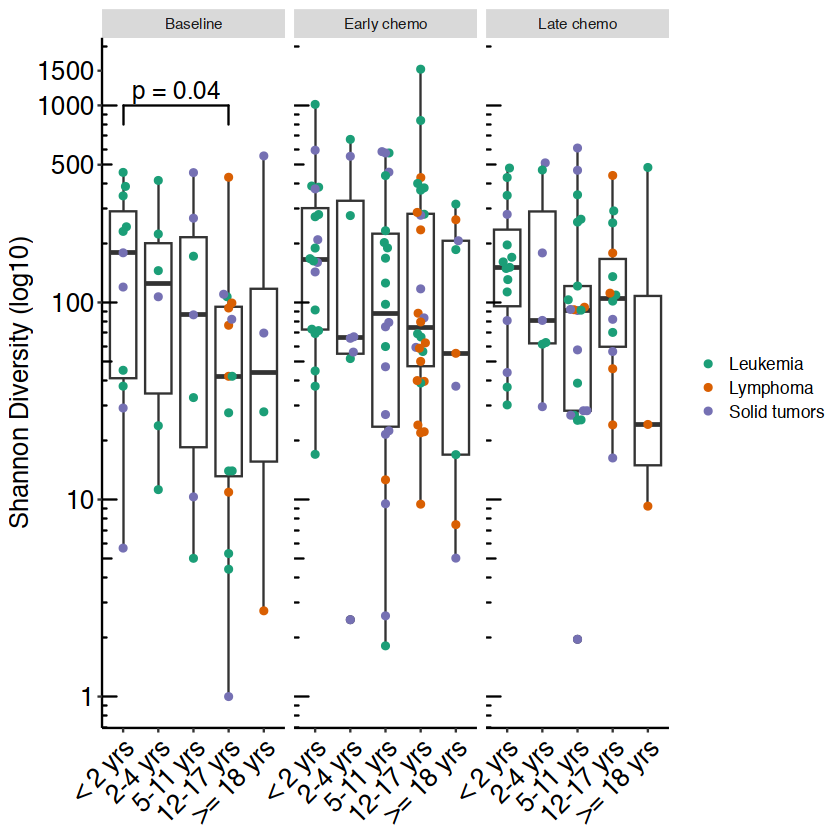

In [120]:
p_pbmc <- p_pbmc + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0,
    manual = TRUE
  ) +
facet_wrap(~Cyclegroup, nrow = 1) + 
labs( y = "Shannon Diversity (log10)")

p_pbmc

In [121]:
pdf(paste0(plotpath, "pbmc_shann_age_facet_cycle.pdf"), width = 8, height = 6)
p_pbmc + theme(legend.position = "bottom")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2

### cfDNA

In [122]:
table(cfdna$agegroup)


  < 2 yrs >= 18 yrs 12-17 yrs   2-4 yrs  5-11 yrs 
       47        25        74        44        69 

In [123]:
cfdna$agegroup <- factor(cfdna$agegroup, levels = c("< 2 yrs", "2-4 yrs", "5-11 yrs", "12-17 yrs", ">= 18 yrs"))

In [124]:
cfdna$Cyclegroup <- NA
cfdna$Cyclegroup[ cfdna$cycle == "X01"] <- "Baseline"
cfdna$Cyclegroup[ cfdna$cycle %in% c("X02", "X03")] <- "Early chemo"
cfdna$Cyclegroup[ cfdna$cycle %in% c("X04", "X05")] <- "Late chemo"

In [125]:
f <- ols(log10shann ~  agegroup + cancergroup, data = cfdna[cfdna$Cyclegroup == "Baseline",])
f

Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = cfdna[cfdna$Cyclegroup == 
    "Baseline", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      55    LR chi2      8.85    R2       0.149    
sigma0.4722    d.f.            6    R2 adj   0.042    
d.f.     48    Pr(> chi2) 0.1822    g        0.207    

Residuals

     Min       1Q   Median       3Q      Max 
-0.76954 -0.38201 -0.05648  0.32964  1.06570 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 0.7695 0.1453  5.30 <0.0001 
agegroup=2-4 yrs         -0.3181 0.1972 -1.61 0.1133  
agegroup=5-11 yrs        -0.3402 0.1900 -1.79 0.0797  
agegroup=12-17 yrs       -0.1721 0.2211 -0.78 0.4401  
agegroup=>= 18 yrs       -0.2592 0.2797 -0.93 0.3588  
cancergroup=Lymphoma      0.3182 0.2100  1.52 0.1362  
cancergroup=Solid tumors  0.0131 0.1508  0.09 0.9309  


In [126]:
f <- ols(log10shann ~  agegroup + cancergroup, data = cfdna[cfdna$Cyclegroup == "Early chemo",])
f


Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = cfdna[cfdna$Cyclegroup == 
    "Early chemo", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     118    LR chi2     33.83    R2       0.249    
sigma0.3510    d.f.            6    R2 adj   0.209    
d.f.    111    Pr(> chi2) 0.0000    g        0.222    

Residuals

     Min       1Q   Median       3Q      Max 
-0.64767 -0.24205 -0.06296  0.16690  1.03494 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 0.9616 0.0787 12.21 <0.0001 
agegroup=2-4 yrs         -0.2388 0.1148 -2.08 0.0399  
agegroup=5-11 yrs        -0.3140 0.1019 -3.08 0.0026  
agegroup=12-17 yrs       -0.2449 0.1052 -2.33 0.0217  
agegroup=>= 18 yrs       -0.4155 0.1238 -3.36 0.0011  
cancergroup=Lymphoma     -0.3355 0.0922 -3.64 0.0004  
cancergroup=Solid tumors -0.1201 0.0769 -1.56 0.1212  


In [127]:
f <- ols(log10shann ~  agegroup + cancergroup, data = cfdna[cfdna$Cyclegroup == "Late chemo",])
f


Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = cfdna[cfdna$Cyclegroup == 
    "Late chemo", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      86    LR chi2     22.03    R2       0.226    
sigma0.4143    d.f.            6    R2 adj   0.167    
d.f.     79    Pr(> chi2) 0.0012    g        0.245    

Residuals

     Min       1Q   Median       3Q      Max 
-1.00658 -0.31386  0.02597  0.29809  1.03699 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.0066 0.1147  8.77 <0.0001 
agegroup=2-4 yrs         -0.1935 0.1580 -1.22 0.2244  
agegroup=5-11 yrs        -0.2445 0.1400 -1.75 0.0847  
agegroup=12-17 yrs       -0.0963 0.1516 -0.64 0.5271  
agegroup=>= 18 yrs        0.0283 0.1951  0.15 0.8849  
cancergroup=Lymphoma     -0.4417 0.1259 -3.51 0.0007  
cancergroup=Solid tumors -0.2908 0.1053 -2.76 0.0071  


In [ ]:
agegroup=2-4 yrs         -0.2388 0.1148 -2.08 0.0399  
agegroup=5-11 yrs        -0.3140 0.1019 -3.08 0.0026  
agegroup=12-17 yrs       -0.2449 0.1052 -2.33 0.0217  
agegroup=>= 18 yrs       -0.4155 0.1238 -3.36 0.0011  
cancergroup=Lymphoma     -0.3355 0.0922 -3.64 0.0004 

In [137]:
log10(50)

[1] 1.69897

In [138]:
annotation_df <- data.frame(
  Cyclegroup = "Early chemo",
  start = rep("< 2 yrs", 4),
  end = c("2-4 yrs", "5-11 yrs", "12-17 yrs", ">= 18 yrs"),
  y = c(1.7, 1.9, 2.1, 2.3),
  label = c("p = 0.04", "p = 0.003", "p = 0.02", "p = 0.001"))

In [139]:
p_cfdna <- baseplot.fx(cfdna, "agegroup", "log10shann", "cancergroup", group_col, "cfDNA")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


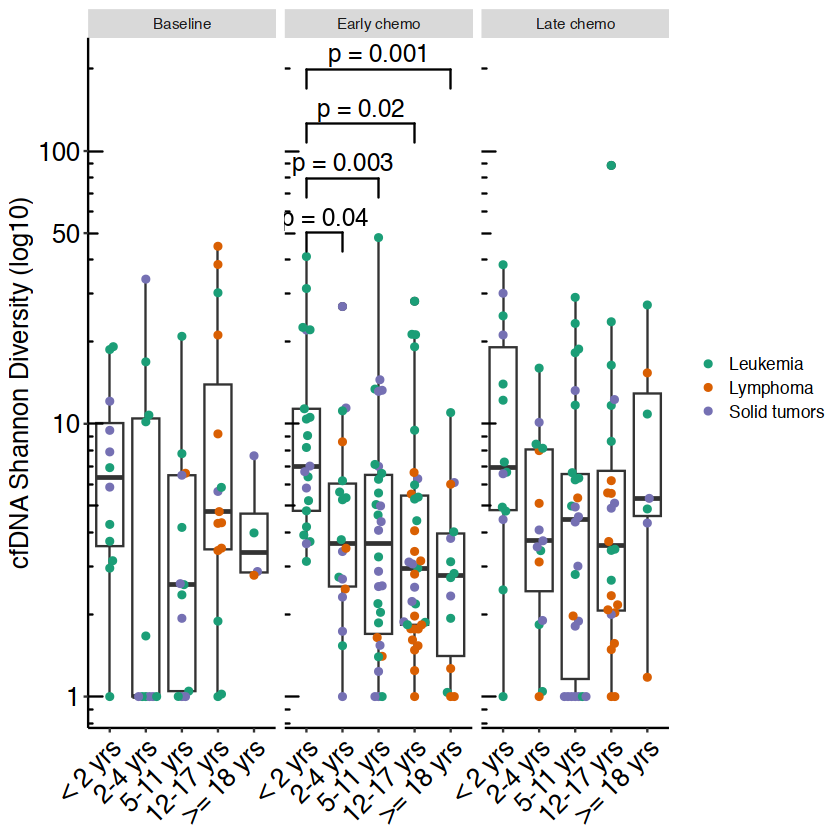

In [140]:
p_cfdna <- p_cfdna + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0,
    manual = TRUE
  ) +
facet_wrap(~Cyclegroup, nrow = 1) + 
labs( y = "cfDNA Shannon Diversity (log10)")

p_cfdna

In [141]:
pdf(paste0(plotpath, "cfdna_shann_age_facet_cycle.pdf"), width = 8, height = 6)
p_cfdna + theme(legend.position = "bottom")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2

## Plots for cancer groups

### PBMC

In [146]:
f <- ols(log10shann ~  cancergroup + Age, data = pbmc[pbmc$Cyclegroup == "Baseline",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = pbmc[pbmc$Cyclegroup == 
    "Baseline", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      44    LR chi2      6.28    R2       0.133    
sigma0.6627    d.f.            3    R2 adj   0.068    
d.f.     40    Pr(> chi2) 0.0986    g        0.289    

Residuals

    Min      1Q  Median      3Q     Max 
-1.4817 -0.4360  0.1341  0.4263  1.3792 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 2.0099 0.1777 11.31 <0.0001 
cancergroup=Lymphoma      0.2592 0.3187  0.81 0.4209  
cancergroup=Solid tumors  0.1359 0.2268  0.60 0.5524  
Age                      -0.0391 0.0161 -2.43 0.0195  


In [147]:
f <- ols(log10shann ~  cancergroup + Age, data = pbmc[pbmc$Cyclegroup == "Early chemo",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = pbmc[pbmc$Cyclegroup == 
    "Early chemo", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      87    LR chi2      8.42    R2       0.092    
sigma0.5938    d.f.            3    R2 adj   0.059    
d.f.     83    Pr(> chi2) 0.0381    g        0.207    

Residuals

     Min       1Q   Median       3Q      Max 
-1.90405 -0.34795  0.03646  0.41055  1.04862 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 2.1916 0.1229 17.84 <0.0001 
cancergroup=Lymphoma     -0.4184 0.1862 -2.25 0.0273  
cancergroup=Solid tumors -0.2873 0.1458 -1.97 0.0522  
Age                      -0.0038 0.0112 -0.34 0.7380  


In [148]:
f <- ols(log10shann ~  cancergroup + Age, data = pbmc[pbmc$Cyclegroup == "Late chemo",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = pbmc[pbmc$Cyclegroup == 
    "Late chemo", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      60    LR chi2      6.14    R2       0.097    
sigma0.4821    d.f.            3    R2 adj   0.049    
d.f.     56    Pr(> chi2) 0.1049    g        0.178    

Residuals

      Min        1Q    Median        3Q       Max 
-1.526319 -0.342945  0.007823  0.329548  0.980776 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 2.1841 0.1123 19.45 <0.0001 
cancergroup=Lymphoma     -0.1920 0.2030 -0.95 0.3483  
cancergroup=Solid tumors -0.2406 0.1408 -1.71 0.0929  
Age                      -0.0141 0.0124 -1.13 0.2636  


In [160]:
annotation_df <- data.frame(
  Cyclegroup = "Early chemo",
  start = c("Leukemia","Leukemia"),
  end = c("Lymphoma","Solid tumors"),
  y = c(3.3,3.5),
  label = c("p = 0.03", "p = 0.05") )

In [172]:
p_pbmc <- baseplot.fx(pbmc, "cancergroup", "log10shann", "cycle", rep("grey",5), "PBMC")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


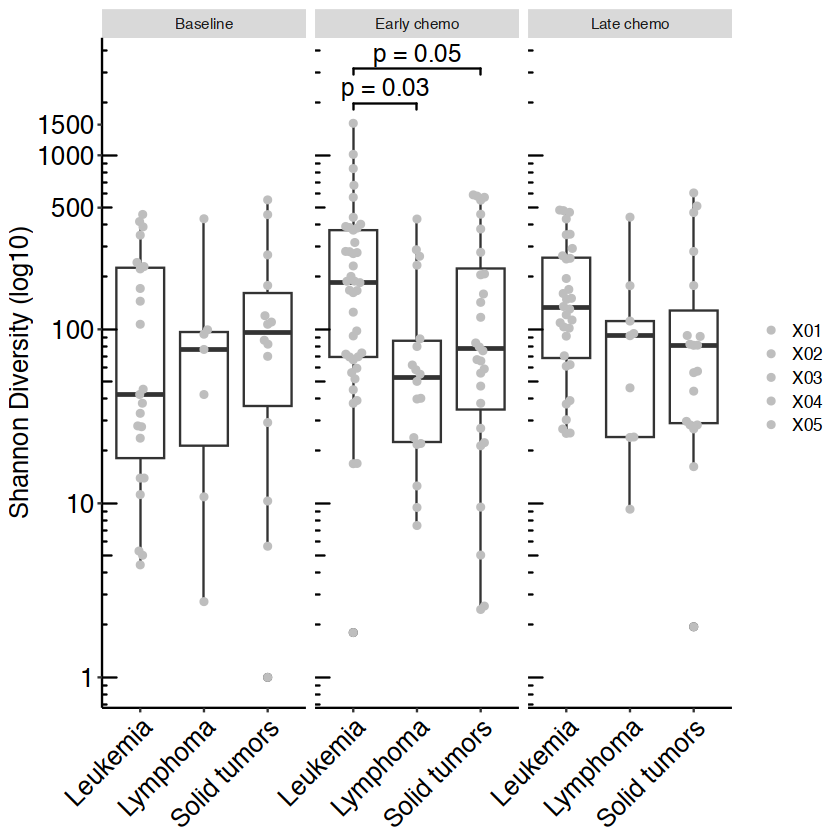

In [173]:
p_pbmc <- p_pbmc + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0, tip_length = 0.01,
    manual = TRUE
  ) +
facet_wrap(~Cyclegroup, nrow = 1) + 
labs( y = "Shannon Diversity (log10)")

p_pbmc

In [174]:
pdf(paste0(plotpath, "pbmc_shann_cancergroup_facet.pdf"), width = 8, height = 6)
p_pbmc + theme(legend.position = "none")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2

### cfDNA

In [175]:
f <- ols(log10shann ~  cancergroup + Age, data = cfdna[cfdna$Cyclegroup == "Baseline",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = cfdna[cfdna$Cyclegroup == 
    "Baseline", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      55    LR chi2      5.04    R2       0.088    
sigma0.4742    d.f.            3    R2 adj   0.034    
d.f.     51    Pr(> chi2) 0.1686    g        0.147    

Residuals

    Min      1Q  Median      3Q     Max 
-0.6116 -0.3790 -0.1089  0.3571  1.0019 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 0.6205 0.1150  5.39 <0.0001 
cancergroup=Lymphoma      0.3970 0.1915  2.07 0.0432  
cancergroup=Solid tumors -0.0088 0.1487 -0.06 0.9531  
Age                      -0.0089 0.0115 -0.77 0.4450  


In [196]:
f <- ols(log10shann ~  cancergroup + Age, data = cfdna[cfdna$Cyclegroup == "Early chemo",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = cfdna[cfdna$Cyclegroup == 
    "Early chemo", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     118    LR chi2     27.33    R2       0.207    
sigma0.3560    d.f.            3    R2 adj   0.186    
d.f.    114    Pr(> chi2) 0.0000    g        0.204    

Residuals

     Min       1Q   Median       3Q      Max 
-0.77658 -0.23618 -0.04354  0.18131  0.93655 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 0.8681 0.0641 13.55 <0.0001 
cancergroup=Lymphoma     -0.3225 0.0896 -3.60 0.0005  
cancergroup=Solid tumors -0.1545 0.0762 -2.03 0.0449  
Age                      -0.0153 0.0056 -2.74 0.0071  


In [177]:
f <- ols(log10shann ~  cancergroup + Age, data = cfdna[cfdna$Cyclegroup == "Late chemo",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = cfdna[cfdna$Cyclegroup == 
    "Late chemo", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      86    LR chi2     17.06    R2       0.180    
sigma0.4185    d.f.            3    R2 adj   0.150    
d.f.     82    Pr(> chi2) 0.0007    g        0.206    

Residuals

     Min       1Q   Median       3Q      Max 
-0.88777 -0.27869  0.02283  0.28040  1.05550 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 0.8825 0.0894  9.88 <0.0001 
cancergroup=Lymphoma     -0.4432 0.1205 -3.68 0.0004  
cancergroup=Solid tumors -0.3318 0.1044 -3.18 0.0021  
Age                       0.0007 0.0081  0.08 0.9353  


In [186]:
annotation_df <- data.frame(
  Cyclegroup = c("Baseline","Early chemo", "Early chemo", "Late chemo", "Late chemo"),
  start = c("Leukemia","Leukemia", "Leukemia","Leukemia", "Leukemia"),
  end = c("Lymphoma", "Lymphoma", "Solid tumors", "Lymphoma","Solid tumors"),
  y = c(2, 2, 2.2, 2, 2.2),
  label = c("p = 0.04", "p = 0.0005", "p = 0.04", "p = 0.0004", "p = 0.002") )

In [191]:
p_cfdna <- baseplot.fx(cfdna, "cancergroup", "log10shann", "cycle", rep("grey",5), "cfDNA")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


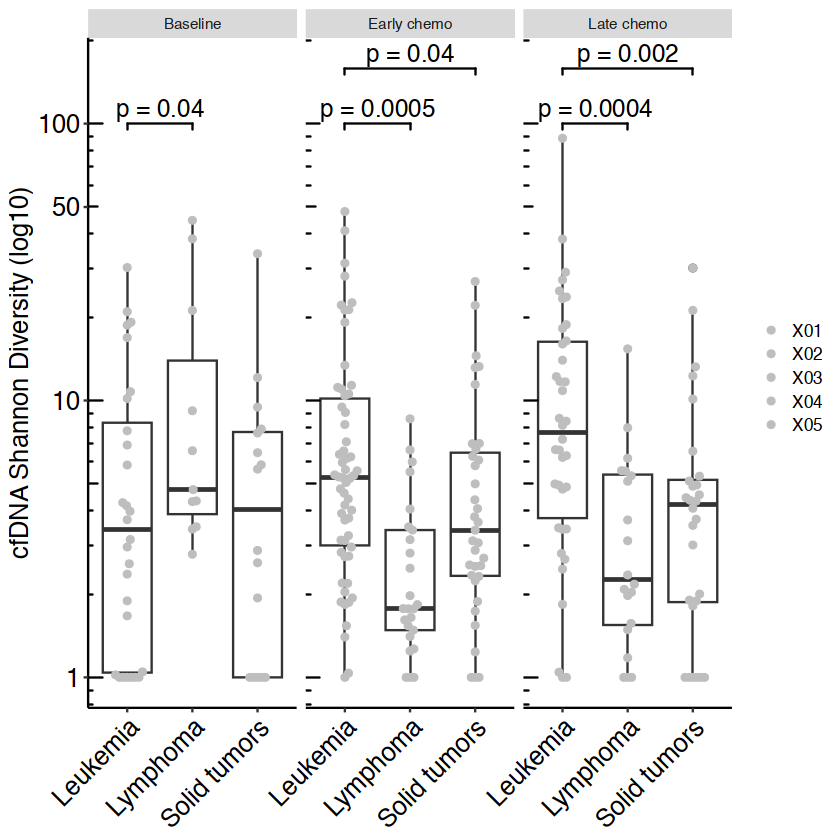

In [192]:
p_cfdna <- p_cfdna + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0, tip_length = 0.01,
    manual = TRUE
  ) +
facet_wrap(~Cyclegroup, nrow = 1) + 
labs( y = "cfDNA Shannon Diversity (log10)")

p_cfdna

In [193]:
pdf(paste0(plotpath, "cfdna_shann_cancergroup_facet.pdf"), width = 8, height = 6)
p_cfdna + theme(legend.position = "none")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2

## Plots for chemo cycles - paired samples

In [ ]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_pbmc <- ggplot(
  pbmc_noLFS,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) 
  #geom_pwc(
  #  mapping = aes(x = cycle, y = log10shann), data = pbmc_noLFS,
  #  p.adjust.method = "BH", label = "{p.adj}",
  #  p.adjust.by = "group", method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
  #labs(title = "Observed Shannon Diversity by Cycle - PBMC (n = 234)\nBH corrected p", y = "Observed Shannon Diversity")

In [ ]:
p_pbmc <- p_pbmc + labs( y = "Shannon Diversity (log10)") + 
scale_x_discrete(labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5")) + #+ facet_wrap(~cancergroup, nrow = 1)
  geom_signif(
    annotations = c("p = 0.002", "p = 0.02"),
    y_position = c(3.2, 3.5), xmin = c(1, 1), xmax = c(2,5), textsize = 6)

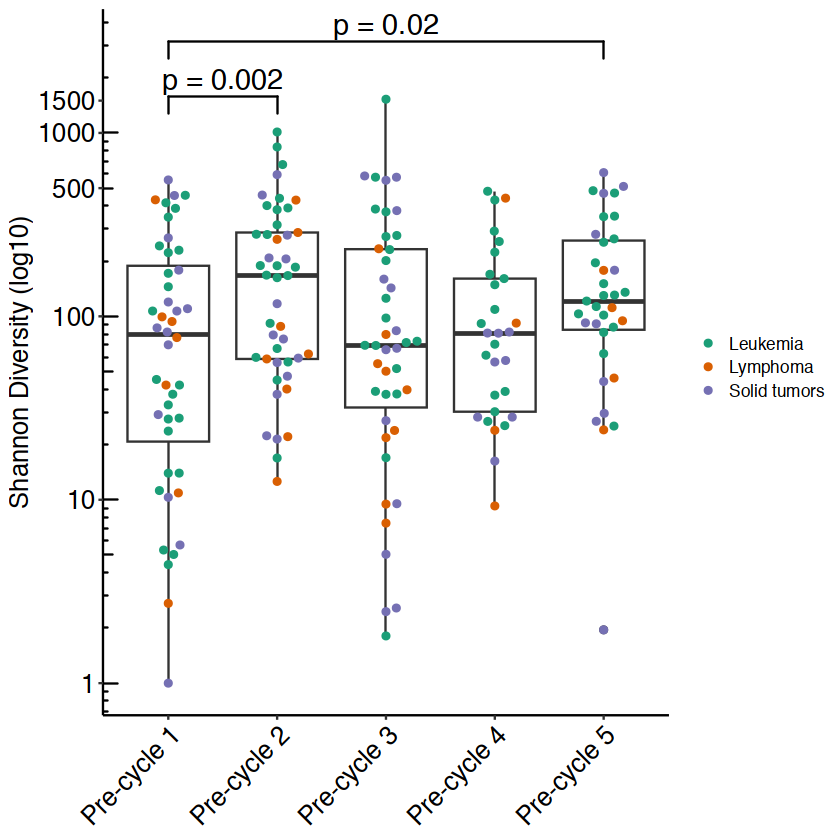

In [ ]:
p_pbmc

In [ ]:
pdf(paste0(plotpath, "pbmc_shannon_diversity_cycle.pdf"), width = 8, height = 6)
p_pbmc
dev.off()

pdf 
  2

In [ ]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_pbmc <- ggplot(
  pbmc_noLFS,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) 
  geom_pwc(
    mapping = aes(x = cycle, y = log10shann), data = pbmc_noLFS,
    p.adjust.method = "BH", label = "{p.adj}",
    p.adjust.by = "group", method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
  labs(title = "Observed Shannon Diversity by Cycle - PBMC (n = 234)\nBH corrected p", y = "Observed Shannon Diversity")

In [ ]:
pairwise.t.test(pbmc_noLFS$log10shann[ pbmc_noLFS$cancergroup == "Solid tumors" ], 
pbmc_noLFS$cycle[ pbmc_noLFS$cancergroup == "Solid tumors" ], 
p.adjust.method = "none", pool.sd = F)


	Pairwise comparisons using t tests with non-pooled SD 

data:  pbmc_noLFS$log10shann[pbmc_noLFS$cancergroup == "Solid tumors"] and pbmc_noLFS$cycle[pbmc_noLFS$cancergroup == "Solid tumors"] 

    X01   X02   X03   X04  
X02 0.435 -     -     -    
X03 0.912 0.401 -     -    
X04 0.575 0.054 0.711 -    
X05 0.583 0.937 0.533 0.242

P value adjustment method: none 

In [ ]:
pdf(paste0(plotpath, "pbmc_shannon_diversity_cycle_facet.pdf"), width = 8, height = 6)
p_pbmc + facet_wrap(~cancergroup, nrow = 1)
dev.off()

pdf 
  2

unpaired samples

In [ ]:
pdf(paste0(plotpath, "pbmc_shannon_diversity_cycle_facet_unpaired.pdf"), width = 8, height = 6)
p_pbmc + facet_wrap(~cancergroup, nrow = 1)
dev.off()

In [332]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_cfnda <- ggplot(
  cfdna,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 1) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  #scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) +
  geom_pwc(
    mapping = aes(x = cycle, y = log10shann), data = cfdna,
    p.adjust.method = "BH", label = "{p.adj}",
    p.adjust.by = "group", method = "t_test", step.increase = 0.1
  ) + # does not allow multiple testing, shows pool.sd = F
  labs(title = "Observed Shannon Diversity by Cycle - cfDNA (n = 270)\nBH corrected p", y = "Observed Shannon Diversity")

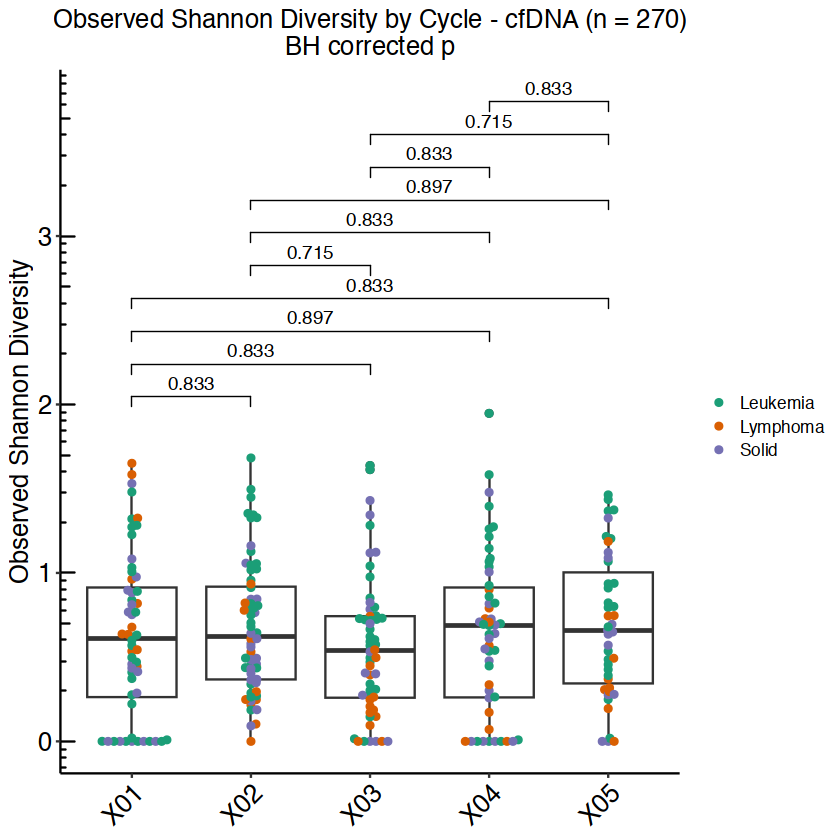

In [333]:
p_cfnda

In [402]:
mytab <- table(pbmc_noLFS$Patient, pbmc_noLFS$cycle) 

In [403]:
#select Patient with cycle 1 and 2
mytab <- mytab[mytab[,1] > 0 & mytab[,2] > 0,]

In [404]:
tmp <- pbmc_noLFS[which(pbmc_noLFS$Patient %in% rownames(mytab)),]
paired_pbmc <- tmp[ tmp$cycle %in% c("X01", "X02"),]

In [405]:
dim(paired_pbmc)

[1] 64 59

In [406]:
pairwise.t.test(paired_pbmc$log10shann, paired_pbmc$cycle, p.adjust.method = "none", pool.sd = F, paired = T)


	Pairwise comparisons using paired t tests 

data:  paired_pbmc$log10shann and paired_pbmc$cycle 

    X01  
X02 0.036

P value adjustment method: none 

In [407]:
table(paired_pbmc$Disease_type)


  ALCL    ALL    AML    BLL    CML   ERMS    EWS     HB     HD HR ALL     NB 
     2     12      6      2      4      2      6      4      4     10      2 
    OS  T-ALL 
     8      2 

In [408]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_pbmc_paired <- ggplot(
  paired_pbmc,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_point(aes(color = cancergroup), cex = 2) +
  geom_line(aes(group = Patient, color = cancergroup)) + 
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) +
  geom_pwc(
    mapping = aes(x = cycle, y = log10shann), data = paired_pbmc,
    p.adjust.method = "none", label = "{p.adj}",
    p.adjust.by = "group", method = "t_test", step.increase = 0.1) + # shows pool.sd = F
  labs(title = "Observed Shannon Diversity by Cycle - PBMC (n = 234)\nBH corrected p", y = "Observed Shannon Diversity") +
  # make facet
    facet_wrap(~cancergroup, nrow = 1)

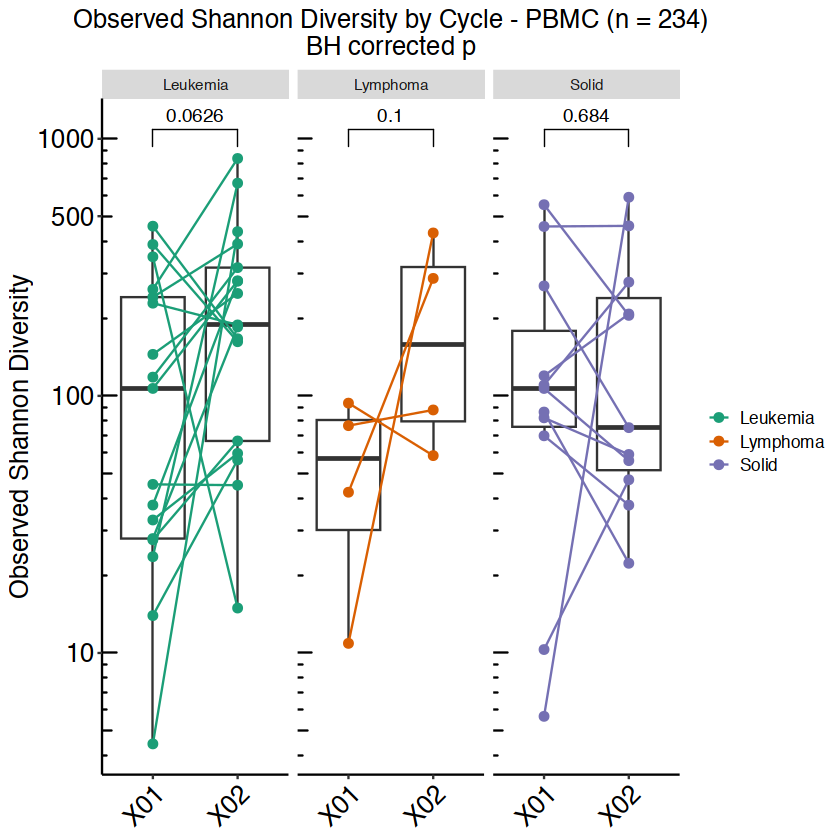

In [409]:
p_pbmc_paired

In [ ]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_pbmc <- ggplot(
  pbmc_noLFS[ pbmc_noLFS$cycle != "X01",],
  aes(x = agegroup, y = log10shann)
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid tumors")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) +
  facet_wrap(~cancergroup, nrow = 1)

  pdf(paste0(plotpath, "pbmc_shannon_diversity_age_faceted.pdf"), width = 8, height = 6)
p_pbmc
dev.off()